In [151]:
import pandas as pd
import numpy as np

In [152]:
maindt = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

In [153]:
maindt

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [154]:
maindt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.6+ MB


In [155]:
maindt.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no null values

In [156]:
maindt.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Grouping the age accorrding to young adut and old

In [157]:
maindt['Age'] = pd.cut(maindt['Age'], bins = [0, 25, 50, 100], labels = ['Young', 'Adult', 'Old'])

<AxesSubplot:xlabel='Age', ylabel='count'>

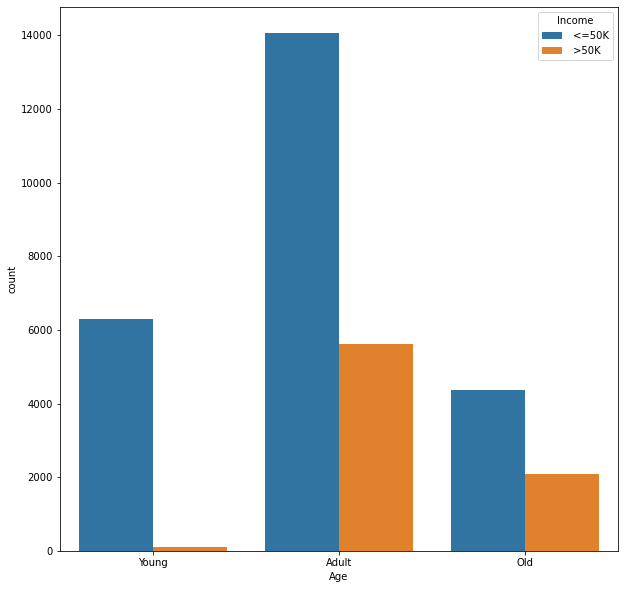

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,10))
sns.countplot(x = 'Age', hue = 'Income', data = maindt  )

In [159]:
maindt['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

We replace the value ? with the mode of the column which is private in this case

In [160]:
maindt2 = maindt.copy()

In [161]:
maindt = maindt2

In [162]:

#maindt['Workclass'].replace([' ?'], 'Private', inplace=True)

In [163]:
maindt['Workclass'] = maindt['Workclass'].astype(object)

In [164]:
maindt['Workclass'].replace(' ?' , ' Private' , inplace = True)

In [165]:
maindt['Workclass'].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

<AxesSubplot:xlabel='Workclass', ylabel='count'>

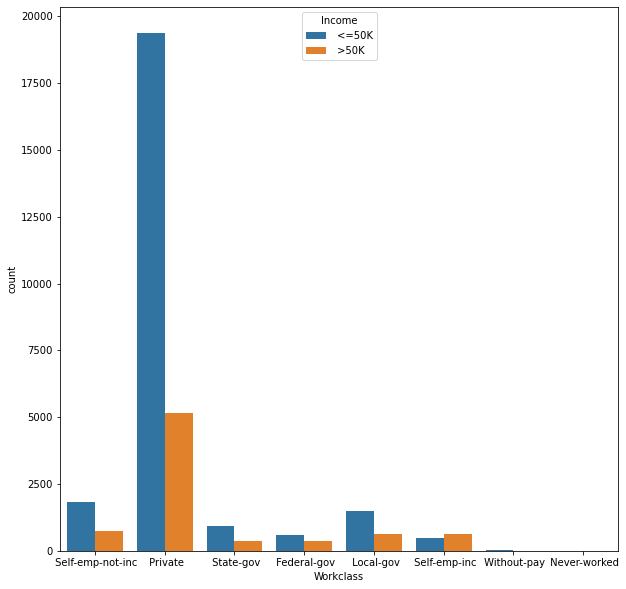

In [166]:
plt.figure(figsize = (10,10))
sns.countplot(x = 'Workclass', hue = 'Income', data = maindt  )

In [167]:
maindt['Fnlwgt'].value_counts()

203488    13
123011    13
164190    13
121124    12
148995    12
          ..
218551     1
201204     1
362999     1
162297     1
145522     1
Name: Fnlwgt, Length: 21647, dtype: int64

In [168]:
maindt.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [169]:
maindt.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,Adult,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,Adult,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,Old,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,Adult,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,Adult,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


we can see that education number is the equivalent numerical value of education column hence education_num column can be dropped

In [170]:
maindt.drop(['Education_num'], axis = 1, inplace = True)

We can replace pre school to 12th with school

In [171]:
maindt['Education'].replace([' 11th', ' 9th', ' 7th-8th', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th'],
                             ' School', inplace = True)

In [172]:
maindt['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 School           4253
 Masters          1723
 Assoc-voc        1382
 Assoc-acdm       1067
 Prof-school       576
 Doctorate         413
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

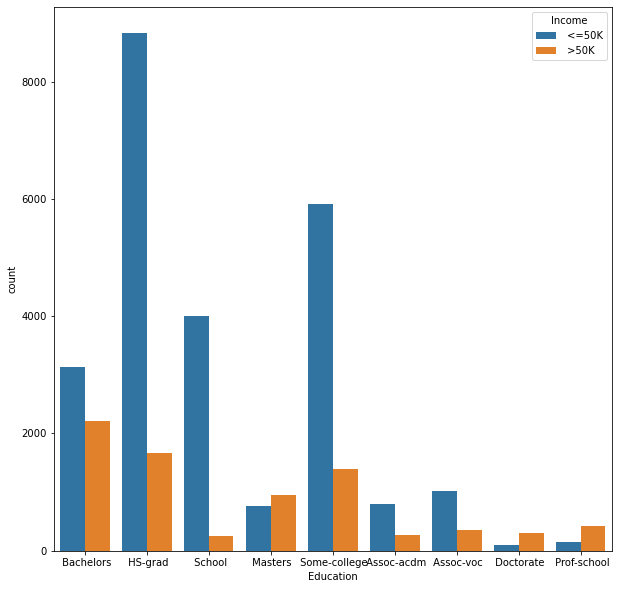

In [173]:
plt.figure(figsize = (10,10))
sns.countplot(x = 'Education', hue = 'Income', data = maindt  )

In [174]:
maindt['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

Nothing to change

In [175]:
maindt['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

Nothing to change

In [176]:
maindt['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

Here ? is present so it will be replaced with the mode

In [177]:
maindt['Occupation'] = maindt['Occupation'].astype(object)
maindt['Occupation'].replace(' ?' , ' Prof-specialty' , inplace = True)

In [178]:
maindt['Occupation'].value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

<AxesSubplot:xlabel='Occupation', ylabel='count'>

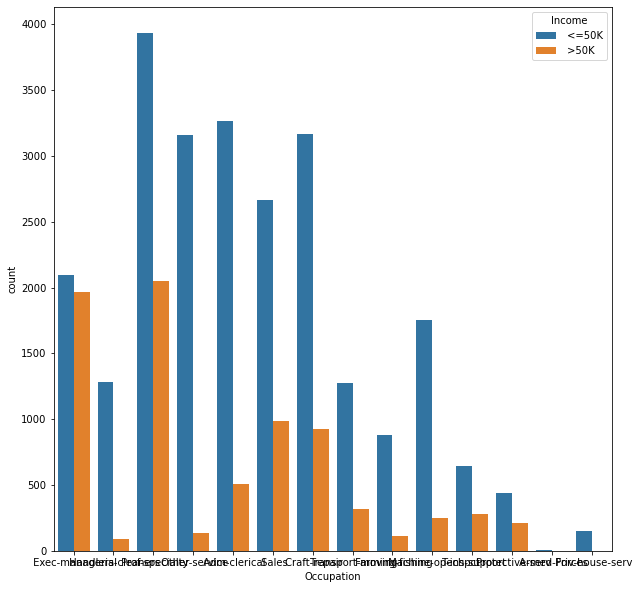

In [179]:
plt.figure(figsize = (10,10))
sns.countplot(x = 'Occupation', hue = 'Income', data = maindt  )

In [180]:
maindt['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

Grouping all races as black except white

In [181]:
maindt['Race'].replace([' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other'],' Black', inplace = True)

In [182]:
maindt['Race'].value_counts()

 White    27815
 Black     4745
Name: Race, dtype: int64

<AxesSubplot:xlabel='Race', ylabel='count'>

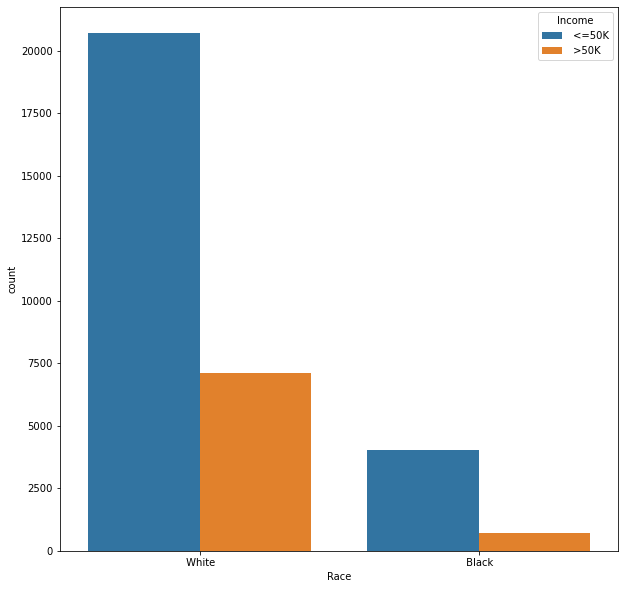

In [183]:
plt.figure(figsize = (10,10))
sns.countplot(x = 'Race', hue = 'Income', data = maindt  )

In [185]:
maindt['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

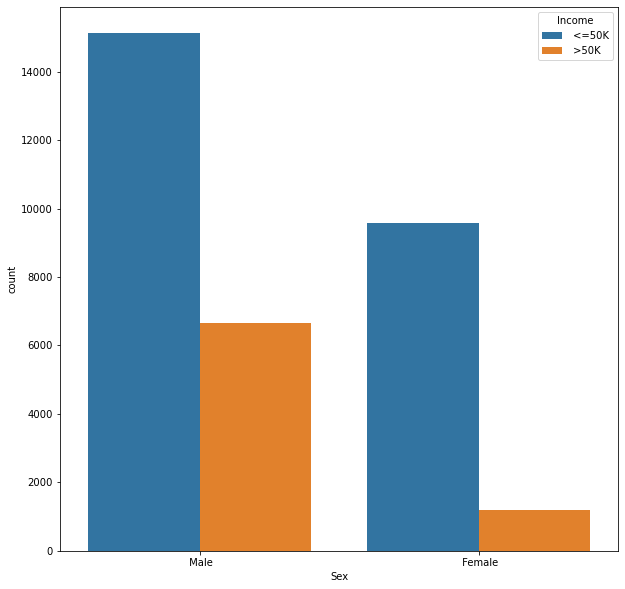

In [186]:
plt.figure(figsize = (10,10))
sns.countplot(x = 'Sex', hue = 'Income', data = maindt  )

In [187]:
maindt.head()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,Adult,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,Adult,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,Old,Private,234721,School,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,Adult,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,Adult,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [189]:
maindt['Hours_per_week'].value_counts()

40    15216
50     2819
45     1824
60     1475
35     1297
      ...  
92        1
74        1
94        1
82        1
87        1
Name: Hours_per_week, Length: 94, dtype: int64

Changing hours into category

In [191]:
maindt['Hours_per_Week'] = pd.cut(maindt['Hours_per_week'], 
                                   bins = [0, 30, 40, 100], 
                                   labels = ['Less_Hours', 'Normal_Hours', 'Extra_Hours'])

<AxesSubplot:xlabel='Hours_per_Week', ylabel='count'>

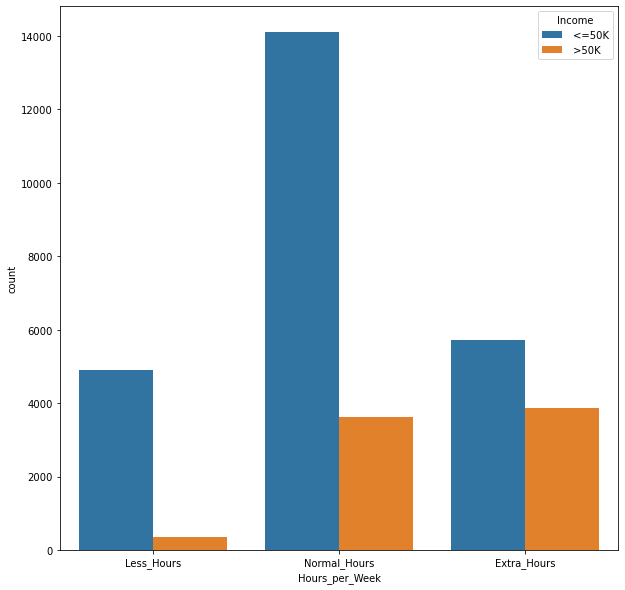

In [192]:
plt.figure(figsize = (10,10))
sns.countplot(x = 'Hours_per_Week', hue = 'Income', data = maindt  )

In [194]:
maindt['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

There is ? which needs to be replaced with other country and replacing all countries except USA with others

In [195]:
maindt['Native_country'].replace([' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], 'Other'  , inplace = True)

<AxesSubplot:xlabel='Native_country', ylabel='count'>

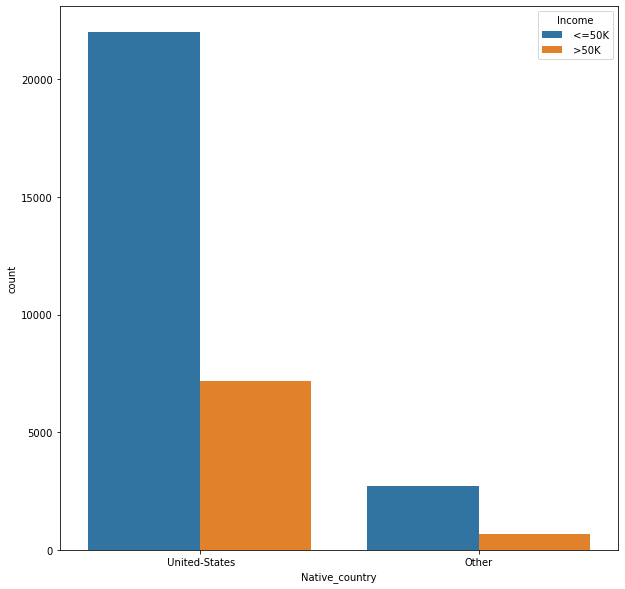

In [196]:
plt.figure(figsize = (10,10))
sns.countplot(x = 'Native_country', hue = 'Income', data = maindt)

Label Encoding all the categorical columns

In [200]:
maindt.drop(['Hours_per_week'], axis = 1, inplace = True)

In [201]:
maindt.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Native_country', 'Income', 'Hours_per_Week'],
      dtype='object')

In [202]:
maindt.head()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Native_country,Income,Hours_per_Week
0,Adult,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,United-States,<=50K,Less_Hours
1,Adult,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,United-States,<=50K,Normal_Hours
2,Old,Private,234721,School,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,United-States,<=50K,Normal_Hours
3,Adult,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,Other,<=50K,Normal_Hours
4,Adult,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,United-States,<=50K,Normal_Hours


In [205]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
maindt["Age"] = le.fit_transform(maindt["Age"])
maindt["Workclass"] = le.fit_transform(maindt["Workclass"])
maindt["Education"] = le.fit_transform(maindt["Education"])
maindt["Occupation"] = le.fit_transform(maindt["Occupation"])
maindt["Relationship"] = le.fit_transform(maindt["Relationship"])
maindt["Race"] = le.fit_transform(maindt["Race"])
maindt["Sex"] = le.fit_transform(maindt["Sex"])
maindt["Hours_per_Week"] = le.fit_transform(maindt["Hours_per_Week"])
maindt["Native_country"] = le.fit_transform(maindt["Native_country"])
maindt["Income"] = le.fit_transform(maindt["Income"])
maindt["Marital_status"] = le.fit_transform(maindt["Marital_status"])

In [206]:
maindt.head(
)

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Native_country,Income,Hours_per_Week
0,0,5,83311,2,2,3,0,1,1,0,0,0,0,1
1,0,3,215646,4,0,5,1,1,1,0,0,0,0,2
2,1,3,234721,7,2,5,0,0,1,0,0,0,0,2
3,0,3,338409,2,2,9,5,0,0,0,0,1,0,2
4,0,3,284582,5,2,3,5,1,0,0,0,0,0,2


C:\Users\rooster\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rooster\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rooster\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

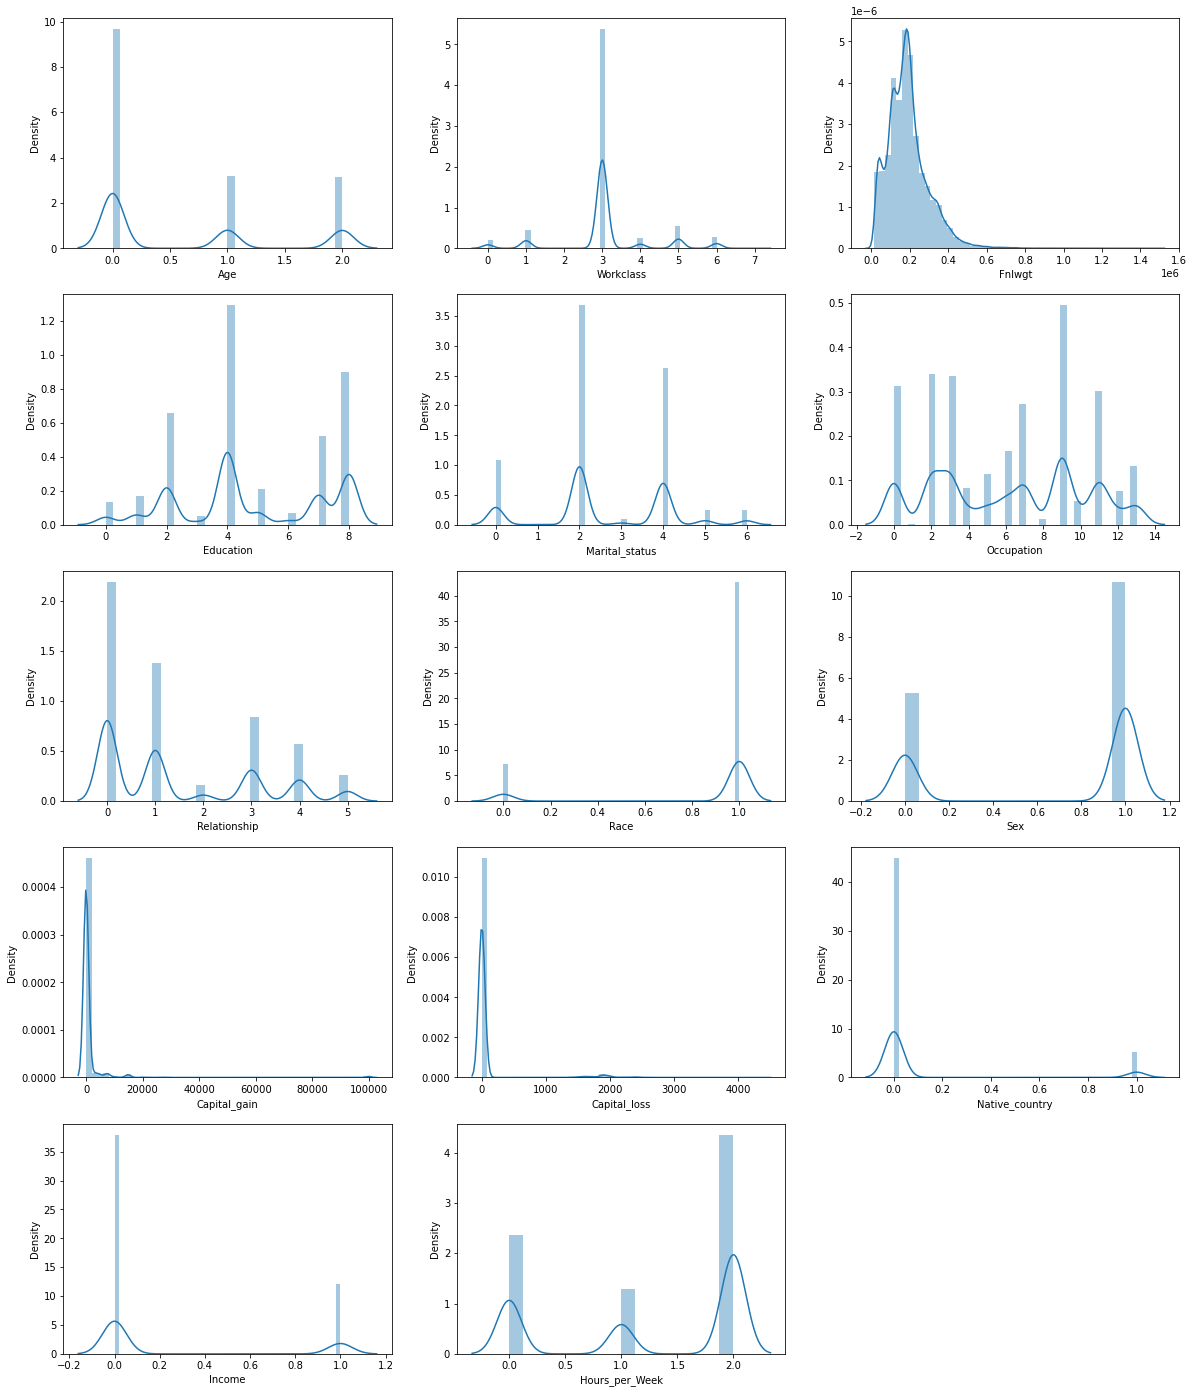

In [207]:
plt.figure(figsize=(20,50))
colcount = len(maindt.columns)
x=1
for col in maindt:
    if x <= colcount:
        ax= plt.subplot(10,3,x)
        sns.distplot(maindt[col])
       # plt.scatter(y=maindt[col],x=maindt['quality'])
        plt.xlabel(col,fontsize=10)
    x=x+1
plt.show()    

In [208]:
maindt.skew()

Age                0.863526
Workclass          0.076178
Fnlwgt             1.446972
Education         -0.043666
Marital_status    -0.013448
Occupation         0.000536
Relationship       0.786784
Race              -2.008214
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Native_country     2.592057
Income             1.212383
Hours_per_Week    -0.509465
dtype: float64

Capital gain and capital loss is highly skewed

Ploting box plot

C:\Users\rooster\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rooster\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\rooster\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rooster\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(sing

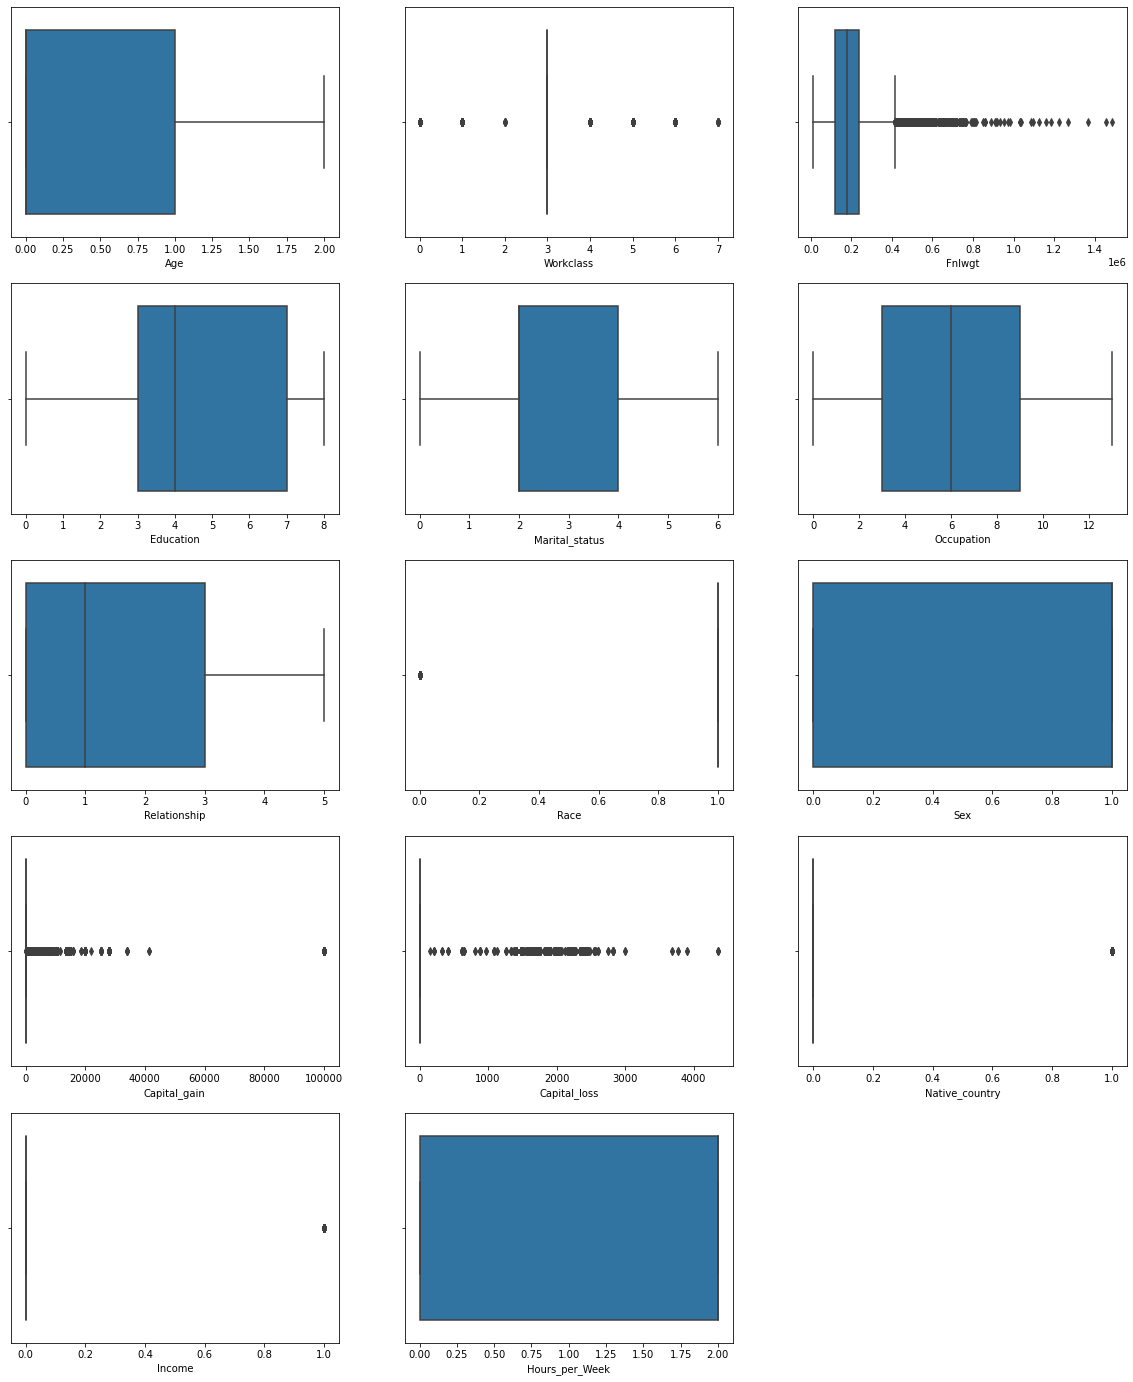

In [209]:
plt.figure(figsize=(20,50))
colcount = len(maindt.columns)
x=1
for col in maindt:
    if x <= colcount:
        ax= plt.subplot(10,3,x)
        sns.boxplot(maindt[col],orient='v')
        plt.xlabel(col,fontsize=10)
    x=x+1
plt.show()

Converting capital gain and loss difference according to range 

In [211]:
maindt['Capital_Diff'] = maindt['Capital_gain'] - maindt['Capital_loss']
maindt.drop(['Capital_gain'], axis = 1, inplace = True)
maindt.drop(['Capital_loss'], axis = 1, inplace = True)

In [212]:
maindt['Capital_Diff'] = pd.cut(maindt['Capital_Diff'], bins = [-5000, 5000, 100000], labels = ['Minor', 'Major'])

In [213]:
maindt["Capital_Diff"] = le.fit_transform(maindt["Capital_Diff"])

In [214]:
maindt.skew()

Age               0.863526
Workclass         0.076178
Fnlwgt            1.446972
Education        -0.043666
Marital_status   -0.013448
Occupation        0.000536
Relationship      0.786784
Race             -2.008214
Sex              -0.719244
Native_country    2.592057
Income            1.212383
Hours_per_Week   -0.509465
Capital_Diff     -4.100261
dtype: float64

Using z score to remove outlier

In [216]:
from scipy.stats import zscore
z_score  = np.abs(zscore(maindt))

In [217]:
maindt3 = maindt.copy()

In [219]:
maindt = maindt[(z_score<3).all(axis = 1)]

In [220]:
maindt.skew()

Age               0.835286
Workclass         0.078780
Fnlwgt            0.629327
Education        -0.063018
Marital_status   -0.052140
Occupation       -0.000654
Relationship      0.745608
Race             -1.998517
Sex              -0.679475
Native_country    2.583280
Income            1.457735
Hours_per_Week   -0.545342
Capital_Diff      0.000000
dtype: float64

Scaling the data

In [221]:
x= maindt.drop(columns=['Income'])
y= maindt['Income']

<AxesSubplot:>

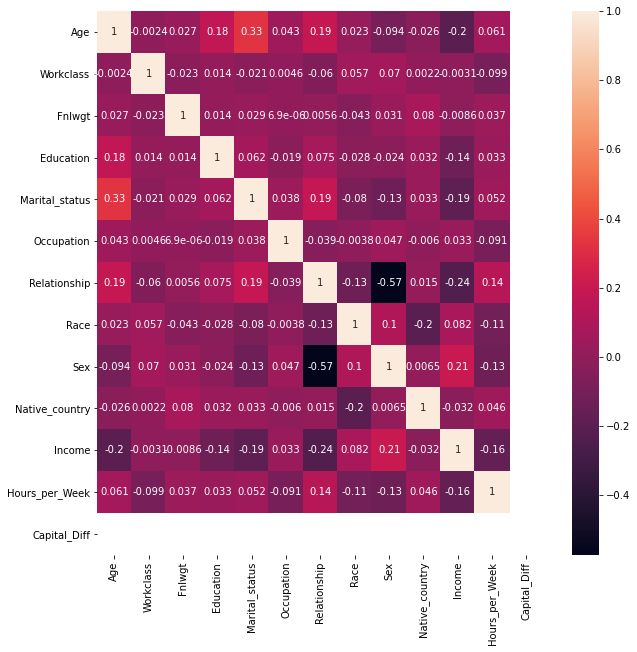

In [222]:
plt.figure(figsize=(10,10))
sns.heatmap(maindt.corr(), color = "k", annot=True  )

No relationship can be found

Building model

In [228]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split , cross_val_score
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
lrm = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=29)
lrm.fit(x_train,y_train)

lrscore = lrm.score(x_test,y_test)
print("Model Score", lrscore )
lrcvscore = cross_val_score(lrm,x,y,cv=5)
print("Cross Valudition", np.mean(lrcvscore) )

Model Score 0.12267191421998114
Cross Valudition 0.12480221958959208


In [229]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

dtcscore = dtc.score(x_test,y_test)
print("Model Score", dtcscore )
dtccvscore = cross_val_score(dtc,x,y,cv=5)
print("Cross Valudition", np.mean(dtccvscore) )
dtcpred = dtc.predict(x_test)
print("Classification Report", classification_report(y_test,dtcpred))
print("Confusion Matrix:\n",confusion_matrix(dtcpred, y_test))

Model Score 0.7873871516420253
Cross Valudition 0.7894268883578013
Classification Report               precision    recall  f1-score   support

           0       0.87      0.86      0.87      6084
           1       0.48      0.50      0.49      1559

    accuracy                           0.79      7643
   macro avg       0.68      0.68      0.68      7643
weighted avg       0.79      0.79      0.79      7643

Confusion Matrix:
 [[5239  780]
 [ 845  779]]


Cv is 78% and accuracy 79 difference of 1%

In [230]:
from sklearn.ensemble import RandomForestClassifier
rfcmodel = RandomForestClassifier()
rfcmodel.fit(x_train,y_train)

rfcscore = rfcmodel.score(x_test,y_test)
print("Model Score", dtcscore )
rfccvscore = cross_val_score(rfcmodel,x,y,cv=5)
print("Cross Valudition", np.mean(rfccvscore) )
rfcpred = rfcmodel.predict(x_test)
print("Cross Valudition", classification_report(y_test,rfcpred))

Model Score 0.7873871516420253
Cross Valudition 0.8188686936857754
Cross Valudition               precision    recall  f1-score   support

           0       0.87      0.90      0.89      6084
           1       0.56      0.49      0.52      1559

    accuracy                           0.82      7643
   macro avg       0.71      0.69      0.70      7643
weighted avg       0.81      0.82      0.81      7643



Cv is 81% and accuracy 82 difference of 1%

In [231]:
svcmodel = SVC()
svcmodel.fit(x_train,y_train)
svcscore = svcmodel.score(x_test,y_test)
print("Model Score", svcscore )
svccvscore = cross_val_score(svcmodel,x,y,cv=5)
print("Cross Valudition", np.mean(svccvscore) )
svcpred = svcmodel.predict(x_test)
print("Cross Valudition", classification_report(y_test,svcpred))

Model Score 0.796022504252257
Cross Valudition 0.7944976950027561
Cross Valudition               precision    recall  f1-score   support

           0       0.80      1.00      0.89      6084
           1       0.00      0.00      0.00      1559

    accuracy                           0.80      7643
   macro avg       0.40      0.50      0.44      7643
weighted avg       0.63      0.80      0.71      7643



C:\Users\rooster\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rooster\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rooster\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cv is 79% and accuracy 80% difference of 1%

In [232]:
from sklearn.ensemble import AdaBoostClassifier
adbc = AdaBoostClassifier()
adbc.fit(x_train,y_train)
adbcscore = adbc.score(x_test,y_test)
print("Model Score", adbcscore )
adbccvscore = cross_val_score(adbc,x,y,cv=5)
print("Cross Valudition", np.mean(adbccvscore) )
adbcpred = adbc.predict(x_test)
print("Cross Valudition", classification_report(y_test,adbcpred))

Model Score 0.8415543634698417
Cross Valudition 0.8442867271126101
Cross Valudition               precision    recall  f1-score   support

           0       0.88      0.93      0.90      6084
           1       0.65      0.48      0.55      1559

    accuracy                           0.84      7643
   macro avg       0.76      0.71      0.73      7643
weighted avg       0.83      0.84      0.83      7643



Cv is 84% and accuracy 84% no difference 

AdaBoostClassifier turns out to be the best model

Using hyper parameter tuning to determine the best parameters

In [234]:
param = {
              'n_estimators' : [100, 200],
              'learning_rate' : [2.2],
              'random_state' : [69, 43],
              
             }

In [238]:
from sklearn.model_selection import GridSearchCV
gscv = GridSearchCV(AdaBoostClassifier(),param,cv=5)

In [239]:
gscv.fit(x_train,y_train)
gscv.best_params_

{'learning_rate': 2.2, 'n_estimators': 100, 'random_state': 69}

In [241]:
model = AdaBoostClassifier(learning_rate=2.2,n_estimators=100,random_state=69)

In [242]:
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print('R2 score = ', r2_score(y_test,pred))
    print('Mean square error =',mean_squared_error(y_test,pred))
    print('Absolute error =',mean_absolute_error(y_test,pred))
    print('RMS value =',np.sqrt(mean_squared_error(y_test,pred)))

NameError: name 'r2_score' is not defined

In [245]:
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_squared_error,mean_absolute_error
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print('R2 score = ', r2_score(y_test,pred))
    print('Mean square error =',mean_squared_error(y_test,pred))
    print('Absolute error =',mean_absolute_error(y_test,pred))
    print('RMS value =',np.sqrt(mean_squared_error(y_test,pred)))

R2 score =  -3.9033074059594997
Mean square error = 0.7961533429281695
Absolute error = 0.7961533429281695
RMS value = 0.8922742532025507


Saving the model

In [246]:
import joblib
joblib.dump(model, "Final_Model.pkl")

['Final_Model.pkl']